<a href="https://colab.research.google.com/github/Grover1204/HandWritten-Math-Symbols/blob/main/Handwritten_math_symbols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HandWritten Math Symbols

Introduction:

In this project, we have developed a machine learning model that can recognize and interpret handwritten mathematical symbols. Think of it as teaching a computer to understand pictures of math symbols - just like numbers and basic math operations (like addition or subtraction) - that people have written by hand.

In [ ]:
import os
import zipfile
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

Preparing Data:

We processed these images to make them easier for the computer to understand. This involved resizing them to a standard size, turning them into grayscale (black and white), and adjusting the image quality.

In [ ]:
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def load_images(base_path, image_size=(28, 28)):
    images = []
    labels = []
    label_map = {}

    for label, subdir in enumerate(sorted(os.listdir(base_path))):
        subdir_path = os.path.join(base_path, subdir)
        if os.path.isdir(subdir_path):
            label_map[label] = subdir
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                try:
                    # Load image, convert to grayscale and resize
                    img = Image.open(file_path).convert('L')
                    img = img.resize(image_size, Image.ANTIALIAS)

                    # Convert image data to numpy array and normalize
                    img_data = np.array(img) / 255.0
                    images.append(img_data)
                    labels.append(label)
                except IOError:
                    pass  # Ignore if any file can't be read

    return np.array(images), np.array(labels), label_map

# Path to the zip file and extraction directory
zip_file_path = '/content/archive.zip'
extraction_path = '/content/handwritten_math_symbols'

# Extracting the zip file
extract_zip(zip_file_path, extraction_path)

# Define the path to the dataset folder (change this based on actual structure)
dataset_path = os.path.join(extraction_path, 'dataset')

# Load images and their labels
images, labels, label_map = load_images(dataset_path)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print("Label mapping:", label_map)


<ipython-input-60-5658ad2941b6>:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(image_size, Image.ANTIALIAS)


Training data shape: (8056, 28, 28)
Testing data shape: (2015, 28, 28)
Label mapping: {1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'add', 12: 'dec', 13: 'div', 14: 'eq', 15: 'mul', 16: 'sub', 17: 'x', 18: 'y', 19: 'z'}


I took 10 random images to visulise the data

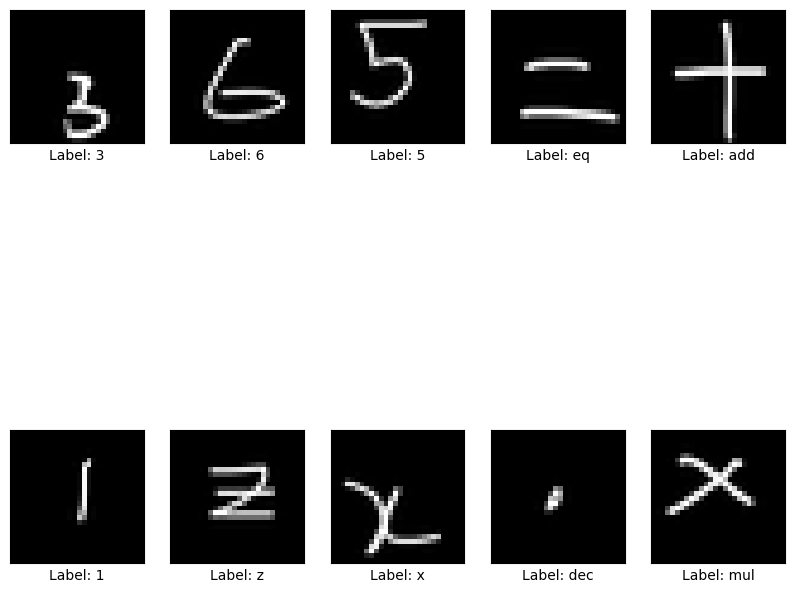

In [ ]:
import random
import matplotlib.pyplot as plt

# Randomly select 10 indices
random_indices = random.sample(range(x_test.shape[0]), 10)

# Plot the images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)  # Arranging plots in 2 rows and 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Label: {adjusted_label_map[y_test[idx]-1]}")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


 Building Model:

  We used a special type of artificial intelligence called a Convolutional Neural Network (CNN), which is excellent for image recognition tasks. This model looks at the images and learns to identify patterns that represent different symbols.

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(19, activation='softmax'))  # 19 classes based on your label mapping
    return model


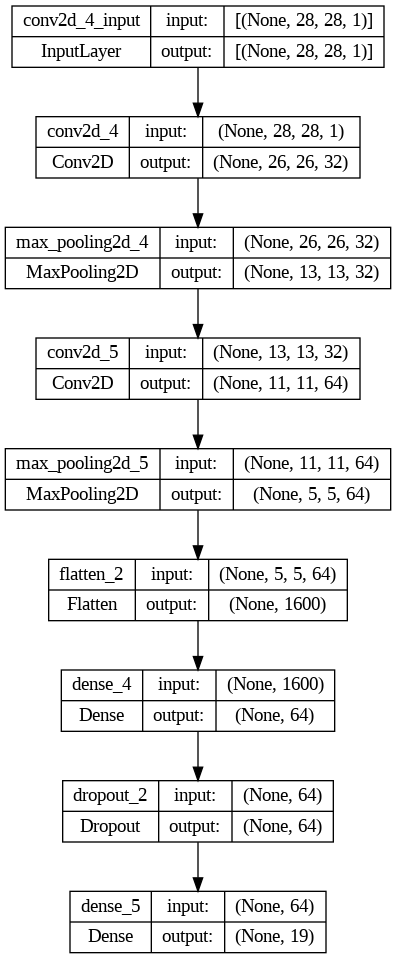

In [ ]:
from tensorflow.keras.utils import plot_model

# Create the model
model = create_model()

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# This will save a PNG image of the model architecture to the file 'model_plot.png'


In [ ]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
y_train_adj = y_train - 1  # Adjusting labels to start from 0
y_test_adj = y_test - 1


In [ ]:
y_train_cat = to_categorical(y_train_adj, 19)  # 19 classes
y_test_cat = to_categorical(y_test_adj, 19)


In [ ]:
history = model.fit(x_train, y_train_cat, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
202/202 [==============================] - 7s 28ms/step - loss: 2.7385 - accuracy: 0.1418 - val_loss: 2.1076 - val_accuracy: 0.4491
Epoch 2/10
202/202 [==============================] - 7s 36ms/step - loss: 1.9691 - accuracy: 0.3804 - val_loss: 1.2893 - val_accuracy: 0.6427
Epoch 3/10
202/202 [==============================] - 5s 27ms/step - loss: 1.5459 - accuracy: 0.5017 - val_loss: 0.9788 - val_accuracy: 0.7481
Epoch 4/10
202/202 [==============================] - 7s 35ms/step - loss: 1.3021 - accuracy: 0.5703 - val_loss: 0.8162 - val_accuracy: 0.7841
Epoch 5/10
202/202 [==============================] - 6s 28ms/step - loss: 1.1709 - accuracy: 0.6145 - val_loss: 0.6995 - val_accuracy: 0.8145
Epoch 6/10
202/202 [==============================] - 6s 28ms/step - loss: 1.0909 - accuracy: 0.6367 - val_loss: 0.6411 - val_accuracy: 0.8201
Epoch 7/10
202/202 [==============================] - 8s 38ms/step - loss: 1.0004 - accuracy: 0.6642 - val_loss: 0.6346 - val_accuracy: 0.8164

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


63/63 [==============================] - 1s 12ms/step - loss: 0.4825 - accuracy: 0.8690
Test accuracy: 86.90%


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally
    height_shift_range=0.1,  # Shift images vertically
    zoom_range=0.1,  # Zoom into images
    horizontal_flip=False,  # Don't flip images horizontally (not useful for numbers/symbols)
)
# Reshape x_train to include the channels dimension (1 for grayscale images)
x_train_reshaped = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Fit the generator to your reshaped data
datagen.fit(x_train_reshaped)



In [ ]:
history = model.fit(datagen.flow(x_train_reshaped, y_train_cat, batch_size=32),
                    epochs=10,
                    validation_data=(x_test.reshape(-1, 28, 28, 1), y_test_cat))


Epoch 1/10
252/252 [==============================] - 13s 47ms/step - loss: 1.1312 - accuracy: 0.6351 - val_loss: 0.4615 - val_accuracy: 0.8685
Epoch 2/10
252/252 [==============================] - 10s 39ms/step - loss: 1.0833 - accuracy: 0.6487 - val_loss: 0.4745 - val_accuracy: 0.8640
Epoch 3/10
252/252 [==============================] - 11s 44ms/step - loss: 1.0248 - accuracy: 0.6658 - val_loss: 0.4307 - val_accuracy: 0.8794
Epoch 4/10
252/252 [==============================] - 11s 46ms/step - loss: 1.0198 - accuracy: 0.6639 - val_loss: 0.3746 - val_accuracy: 0.8958
Epoch 5/10
252/252 [==============================] - 11s 45ms/step - loss: 0.9477 - accuracy: 0.6879 - val_loss: 0.3604 - val_accuracy: 0.8973
Epoch 6/10
252/252 [==============================] - 10s 39ms/step - loss: 0.9317 - accuracy: 0.6961 - val_loss: 0.3558 - val_accuracy: 0.8953
Epoch 7/10
252/252 [==============================] - 10s 40ms/step - loss: 0.8927 - accuracy: 0.7064 - val_loss: 0.3316 - val_accuracy:

In [ ]:
model.save('my_model')  # No file extension specified


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


63/63 [==============================] - 1s 19ms/step - loss: 0.3421 - accuracy: 0.8983
Test accuracy: 89.83%


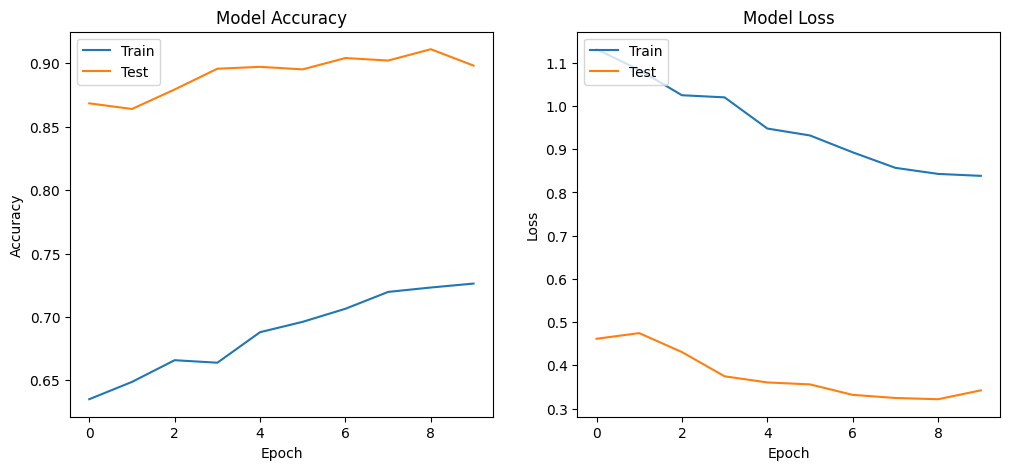

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


63/63 [==============================] - 1s 14ms/step


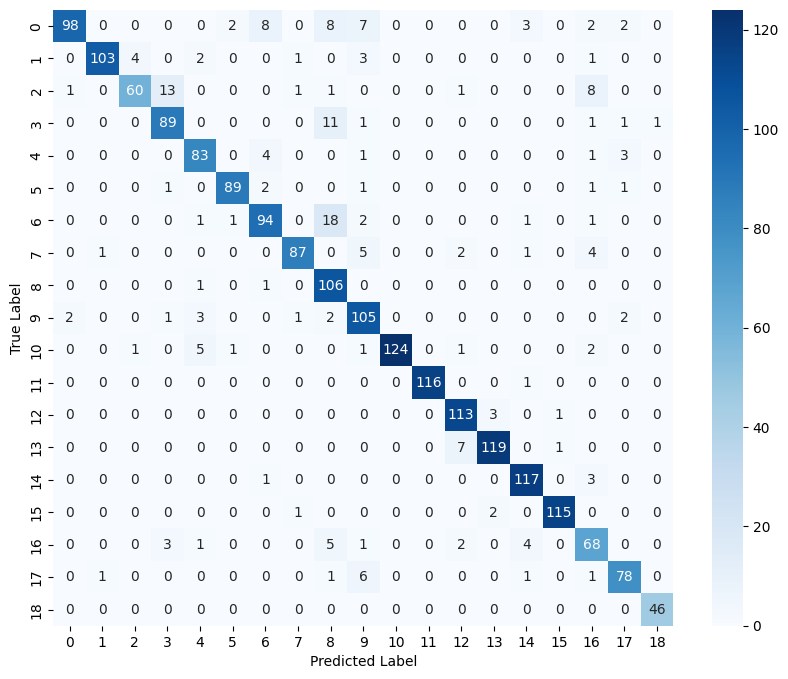

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotting
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


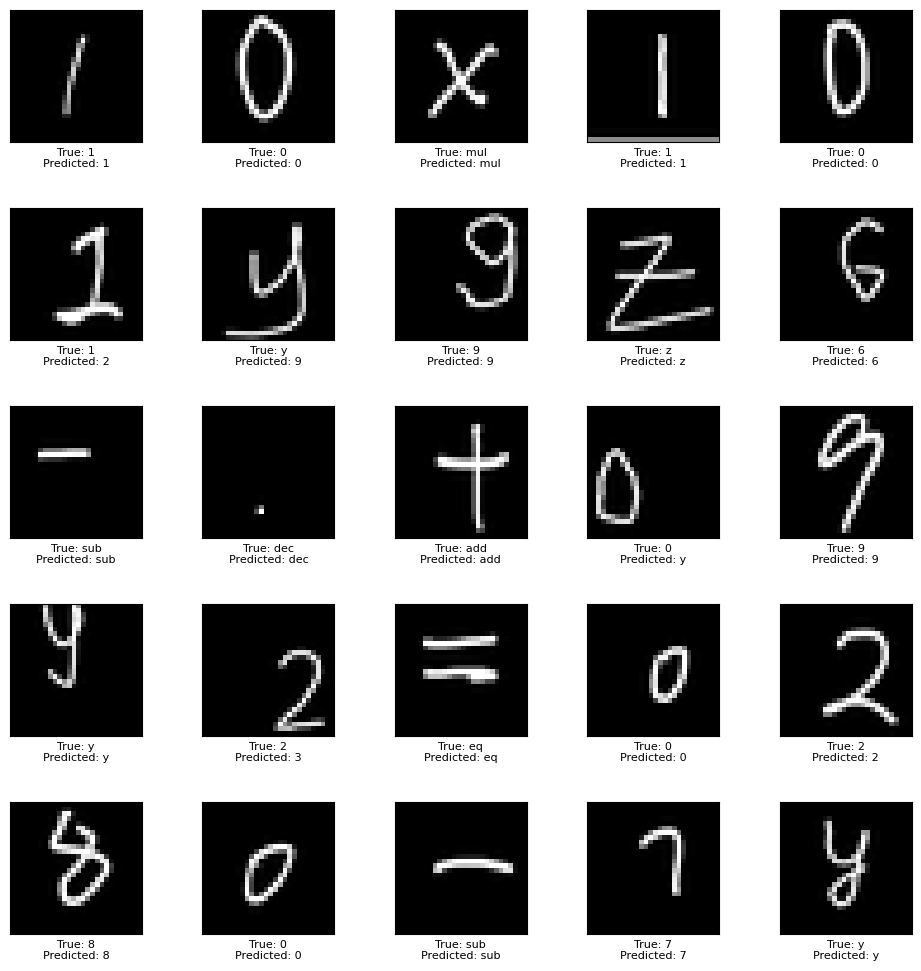

In [ ]:
# Adjust label_map to start from 0
adjusted_label_map = {i: label for i, label in enumerate(sorted(label_map.values()))}

plt.figure(figsize=(12, 12))  # Increase figure size
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {adjusted_label_map[y_true[i]]}\nPredicted: {adjusted_label_map[y_pred_classes[i]]}", fontsize=8)  # Reduce font size
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between plots
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/my_model')


In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path, target_size=(28, 28)):
    # Load image, convert to grayscale, and resize
    img = Image.open(image_path).convert('L')
    img = img.resize(target_size, Image.ANTIALIAS)

    # Convert to numpy array and normalize
    img_array = np.array(img) / 255.0

    # Reshape array to match the input shape of the model
    img_array = img_array.reshape(1, 28, 28, 1)  # 1 sample, 28x28 size, 1 channel

    return img_array


In [ ]:
def predict_image(model, image_path, label_map):
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Map predicted class to label
    predicted_label = label_map[predicted_class[0]]

    return predicted_label


In [ ]:
import matplotlib.pyplot as plt

def predict_and_show_image(model, image_path, label_map):
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Map predicted class to label
    predicted_label = label_map[predicted_class[0]]

    # Display the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28), Image.LANCZOS)  # Use LANCZOS for resizing
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')  # Turn off axis numbers and labels
    plt.show()

    return predicted_label


1/1 [==============================] - 0s 82ms/step


<ipython-input-55-57511f8724cd>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


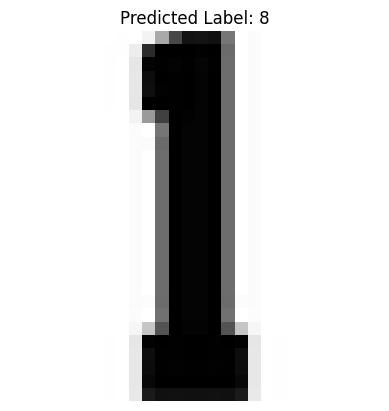

In [ ]:
image_path = '/content/11a.jpeg'
predicted_label = predict_and_show_image(model, image_path, adjusted_label_map)
